In [37]:
import sys
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib notebook

In [2]:
print(sys.version)

2.7.11 |Anaconda 4.0.0 (64-bit)| (default, Dec  6 2015, 18:08:32) 
[GCC 4.4.7 20120313 (Red Hat 4.4.7-1)]


In [3]:
num_rand = 42
np.random.seed(num_rand)

# Dados

In [4]:
bank = pd.read_csv("bank-full.csv", sep=";", quotechar="\"")

In [5]:
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
y            45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Respostas

## Qual profissão tem mais tendência a fazer um empréstimo? De qual tipo?

Resposta: management

In [30]:
bank[bank.y == "yes"].groupby(['job','y'])['y'].count().sort_values(ascending=False)

job            y  
management     yes    1301
technician     yes     840
blue-collar    yes     708
admin.         yes     631
retired        yes     516
services       yes     369
student        yes     269
unemployed     yes     202
self-employed  yes     187
entrepreneur   yes     123
housemaid      yes     109
unknown        yes      34
Name: y, dtype: int64

## Fazendo uma relação entre número de contatos e sucesso da campanha quais são os pontos relevantes a serem observados?

Resposta:
- Não existe uma relação crescente entre a quantidade de ligações e o sucesso da campanha;
- 90% dos que dizem "yes" à campanha respondem em até 4 ligações
- 90% dos que dizem "no" à campanha respondem em até
- Existem mais pessoas que respondem positivamente à campanha a partir da 1ª ligação

<IPython.core.display.Javascript object>


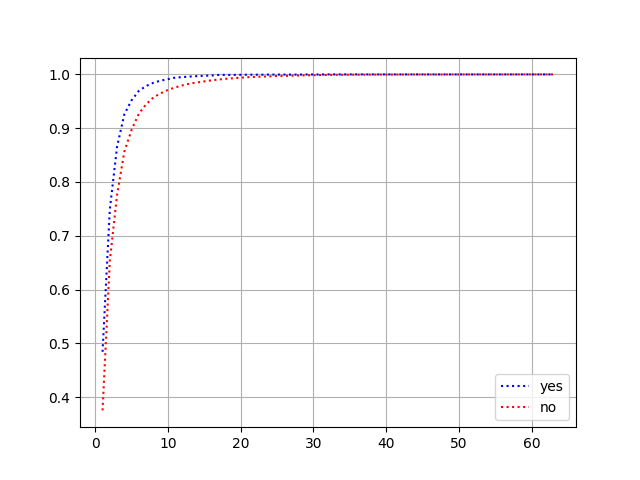

In [96]:
yes = []
no = []
vals = []
for x in set(bank.campaign):
    selected = bank.loc[bank.campaign == x]
    vals.append(x)
    yes.append( 1.*np.sum(selected.y == 'yes') / np.sum(bank.y == 'yes') )
    no.append( 1.*np.sum(selected.y == 'no') / np.sum(bank.y == 'no') )
    
plt.figure()
plt.plot(vals,np.cumsum(yes),'b:',label='yes') # azul
plt.plot(vals,np.cumsum(no),'r:', label='no') # vermelho
plt.legend()
plt.grid()

## Baseando-se nos resultados de adesão desta campanha qual o número médio e o máximo de ligações que você indica para otimizar a adesão?

Observando o gráfico anterior:
- Número médio: 4 ligações
- Número máximo: 10 ligações

## O resultado da campanha anterior tem relevância na campanha atual?

Resposta: o resultado da campanha anterior (poutcome_sucess) possui 25% de relevância para a campanha atual.

## Qual o fator determinante para que o banco exija um seguro de crédito?

Resposta: são fatores determinantes 

In [136]:
bank_loan = bank[bank.loan == "yes"].loc[:, ['housing', 'default', 'age']]

In [134]:
bank_loan['housing'].value_counts()

yes    4367
no     2877
Name: housing, dtype: int64

In [135]:
bank_loan['default'].value_counts()

no     6943
yes     301
Name: default, dtype: int64

In [142]:
bank_loan['age'].value_counts().sort_values()

71      1
64      1
66      1
65      1
72      2
62      3
20      3
21      8
61     11
22     12
23     19
24     38
60     82
25     99
58    106
57    127
55    135
59    140
54    147
53    149
56    156
50    159
26    161
27    167
49    171
42    177
51    181
43    181
28    187
48    188
46    191
52    194
29    197
38    199
44    200
47    207
45    213
41    214
39    229
40    230
37    259
36    260
30    288
31    295
34    295
33    307
35    318
32    335
Name: age, dtype: int64

## Quais são as características mais proeminentes de um cliente que possua empréstimo imobiliário?

Resposta: 
- A maior parte é casada, concluiu o Ensino Médio e atua com blue-collar working;
- Entre os não casados, a maior parte atua com gestão.

In [123]:
bank_housing_yes = bank[bank.housing == "yes"].loc[:, ['job', 'marital', 'education']]

In [124]:
bank_housing_yes.head()

,job,marital,education
0,management,married,tertiary
1,technician,single,secondary
2,entrepreneur,married,secondary
3,blue-collar,married,unknown
5,management,married,tertiary


In [130]:
bank_housing_yes.groupby("marital").describe()

education          job
marital                                
divorced count        2907         2907
         unique          4           12
         top     secondary   management
         freq         1704          581
married  count       15321        15321
         unique          4           12
         top     secondary  blue-collar
         freq         8431         5100
single   count        6902         6902
         unique          4           12
         top     secondary   management
         freq         3903         1465